In [105]:
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
#extraction fuction to obtain injury & playlist data (without tracking data)

from NFL_Injury_Cleaning_Functions import *
pd.set_option('mode.chained_assignment', None)

In [7]:
def Vis_Data_Cleaner(playlist, injuries):
    # This is the overall function for cleaning and merging the data for Visualizations 

    import pandas as pd
    import numpy as np

    playlist = Vis_Process_Playlist_Data(playlist)
    injuries = Vis_Process_Injury_Data(injuries)

    Vis_outer = pd.merge(playlist, injuries, on='PlayKey', how='outer')

    Vis_outer.BodyPart.fillna("NoInjury", inplace=True)
    Vis_outer.InjuryDuration.fillna(0, inplace=True)
    Vis_outer.SevereInjury.fillna(0, inplace=True)

    return Vis_outer

In [8]:
#Obtaining Vis_Outer data
playlist = pd.read_csv("NFL_Turf/PlayList.csv")
injuries = pd.read_csv("NFL_Turf/InjuryRecord.csv")

Vis_outer = Vis_Data_Cleaner(playlist, injuries)

In [9]:
#Obtaining ML_Outer data for numeric values 

def ML_Data_Cleaner(playlist, injuries):
    # This is the overall function that cleans and merges the data for Machine Learning data processing

    playlist = ML_Process_Playlist_Data(playlist)
    injuries = ML_Process_Injury_Data(injuries)
    
    ML_outer = pd.merge(playlist, injuries, on='PlayKey', how='outer')
    
    ML_outer.InjuryType.fillna(0, inplace=True)
    ML_outer.InjuryDuration.fillna(0, inplace=True)
    ML_outer.SevereInjury.fillna(0, inplace=True)

    return ML_outer

playlist = pd.read_csv("NFL_Turf/PlayList.csv")
injuries = pd.read_csv("NFL_Turf/InjuryRecord.csv")

ML_outer = ML_Data_Cleaner(playlist, injuries)

In [10]:
Vis_outer.dtypes

PlayKey            object
RosterPosition     object
StadiumType        object
FieldType          object
Temperature         int64
Weather            object
PlayType           object
PlayerGamePlay      int64
Position           object
DaysPlayed          int64
BodyPart           object
InjuryDuration    float64
SevereInjury      float64
dtype: object

In [238]:
Vis_outer.head()

,PlayKey,RosterPosition,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,DaysPlayed,BodyPart,InjuryDuration,SevereInjury
7096,31070-3-7,Running Back,Outdoor,Natural,89,Clear,Rush,7,RB,78,Knee,42.0,1.0
10683,33337-8-15,Tight End,Outdoor,Natural,81,Cloudy,Pass,15,TE,92,Foot,28.0,1.0
11860,33474-19-7,Safety,Outdoor,Natural,79,Cloudy,Rush,7,FS,120,Knee,28.0,1.0
16925,34347-5-9,Wide Receiver,Outdoor,Natural,48,Cloudy,Kick,9,WR,102,Knee,7.0,0.0
17959,35570-15-35,Offensive Lineman,Outdoor,Natural,79,Clear,Pass,35,T,116,Knee,7.0,0.0


In [12]:
#Dataset - Count of all injuries vs no injury

Vis_outer['BodyPart'].value_counts()

NoInjury    260653
Knee            36
Ankle           35
Foot             6
Name: BodyPart, dtype: int64

In [13]:
#Drop the NoInjury for visualization 
Vis_outer.drop(Vis_outer[Vis_outer['BodyPart'] == "NoInjury"].index, inplace = True)
Vis_outer

,PlayKey,RosterPosition,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,DaysPlayed,BodyPart,InjuryDuration,SevereInjury
7096,31070-3-7,Running Back,Outdoor,Natural,89,Clear,Rush,7,RB,78,Knee,42.0,1.0
10683,33337-8-15,Tight End,Outdoor,Natural,81,Cloudy,Pass,15,TE,92,Foot,28.0,1.0
11860,33474-19-7,Safety,Outdoor,Natural,79,Cloudy,Rush,7,FS,120,Knee,28.0,1.0
16925,34347-5-9,Wide Receiver,Outdoor,Natural,48,Cloudy,Kick,9,WR,102,Knee,7.0,0.0
17959,35570-15-35,Offensive Lineman,Outdoor,Natural,79,Clear,Pass,35,T,116,Knee,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256407,47307-10-18,Cornerback,Indoor,Synthetic,68,Indoor,Pass,18,CB,137,Knee,7.0,0.0
256408,47307-10-18,Cornerback,Indoor,Synthetic,68,Indoor,Pass,18,CB,137,Ankle,7.0,0.0
257234,47334-8-1,Safety,Indoor,Synthetic,74,Clear,Kick,1,DB,121,Knee,7.0,0.0
258232,47382-3-34,Linebacker,Indoor,Synthetic,70,Indoor,Rush,34,LB,81,Ankle,1.0,0.0


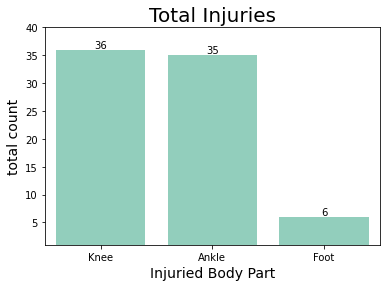

In [14]:
# Bar chart of injuries per body type

ax = sns.countplot(data=Vis_outer, x='BodyPart', 
              order = Vis_outer['BodyPart'].value_counts().index,
             color='#88d8c0')

plt.title('Total Injuries',fontsize=20)
plt.xlabel('Injuried Body Part',fontsize=14)
plt.ylabel('total count', fontsize=14)
plt.ylim(1,40)


for i in ax.containers:
    ax.bar_label(i,)

plt.show()

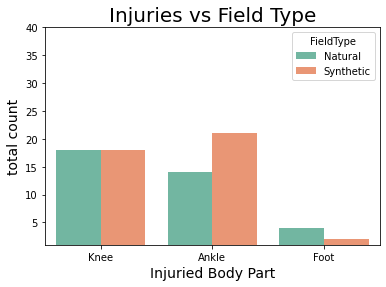

In [16]:
#Bar chart of injury types per Field Type 

sns.countplot(data=Vis_outer, x='BodyPart', hue='FieldType',
              order = Vis_outer['BodyPart'].value_counts().index,
             palette="Set2")

plt.title('Injuries vs Field Type',fontsize=20)
plt.xlabel('Injuried Body Part',fontsize=14)
plt.ylabel('total count', fontsize=14)
plt.ylim(1, 40)
plt.show()

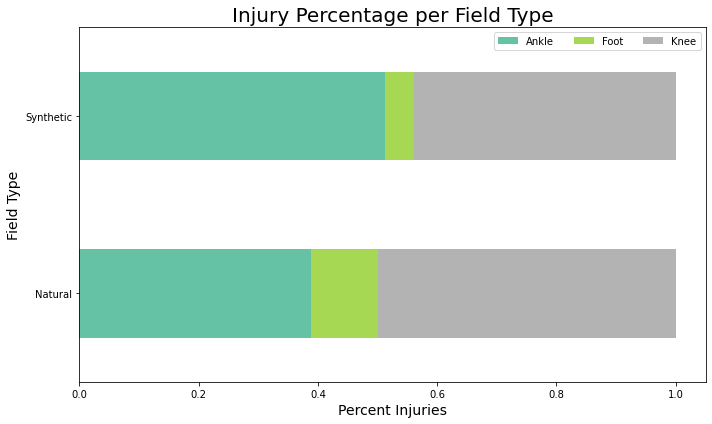

In [171]:
# 100% Bar chart of injuries per Field Type - horizontal

# creating filter of bool series from isin()
FieldType_filter = Vis_outer["FieldType"].isin(["Natural", "Synthetic"])

# displaying data with filter applied 
Vis_outer[FieldType_filter]

cross_tab_prop = pd.crosstab(index=Vis_outer['FieldType'],
                             columns=Vis_outer['BodyPart'],
                             normalize="index")

cross_tab = pd.crosstab(index=Vis_outer['BodyPart'],
                        columns=Vis_outer['FieldType'])
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=4)
plt.title("Injury Percentage per Field Type",fontsize=20)
plt.xlabel("Percent Injuries",fontsize=14)
plt.ylabel("Field Type", fontsize=14)
plt.show()

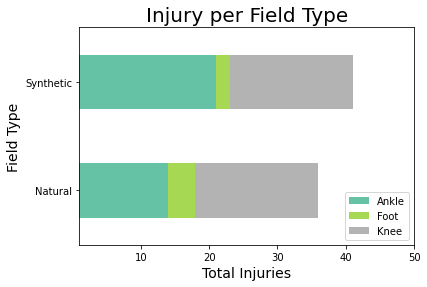

In [85]:
# Bar chart of injury types per Field Type - horizontal

injuries_fieldtype = Vis_outer.groupby(['BodyPart', 'FieldType']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='FieldType', values=0)
injuries_fieldtype.plot(kind='barh', stacked=True, colormap='Set2')

plt.title("Injury per Field Type", fontsize=20)
plt.xlabel("Total Injuries",fontsize=14)
plt.ylabel("Field Type", fontsize=14)

plt.legend(loc='lower right')
plt.xlim(1,50)
plt.show()

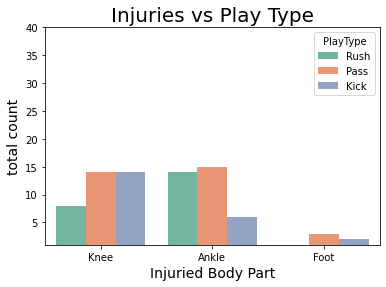

In [87]:
# Bar chart Injuries per player type

sns.countplot(data=Vis_outer, x='BodyPart', hue='PlayType',
              order = Vis_outer['BodyPart'].value_counts().index,
             palette="Set2")

plt.title('Injuries vs Play Type',fontsize=20)
plt.xlabel('Injuried Body Part',fontsize=14)
plt.ylabel('total count', fontsize=14)
plt.ylim(1, 40)
plt.show()

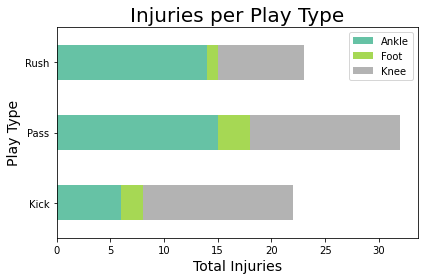

In [172]:
#Injuries vs PlayType

injuries_weather = Vis_outer.groupby(['BodyPart', 'PlayType']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='PlayType', values=0)
injuries_weather.plot(kind='barh', stacked=True, colormap='Set2')

plt.title("Injuries per Play Type", fontsize=20)
plt.xlabel("Total Injuries",fontsize=14)
plt.ylabel("Play Type", fontsize=14)

plt.legend(loc='upper right')
plt.show()

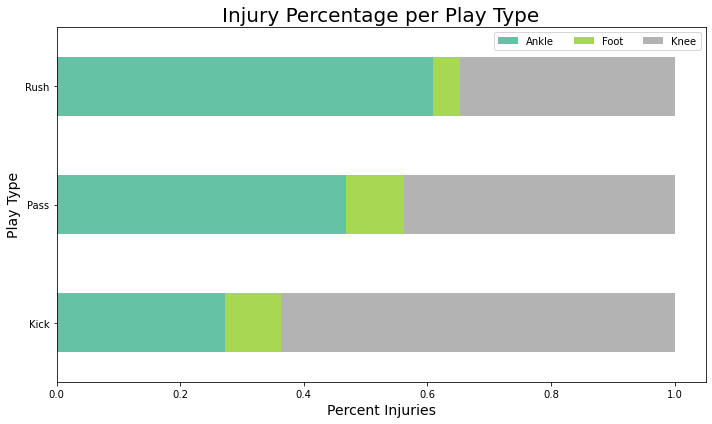

In [173]:
# 100% Bar chart of injuries per Play Type - horizontal

# creating filter of bool series from isin()
PlayType_filter = Vis_outer["PlayType"].isin(["Rush", "Pass", "Kick"])

# displaying data with filter applied 
Vis_outer[PlayType_filter]

cross_tab_prop = pd.crosstab(index=Vis_outer['PlayType'],
                             columns=Vis_outer['BodyPart'],
                             normalize="index")

cross_tab = pd.crosstab(index=Vis_outer['BodyPart'],
                        columns=Vis_outer['PlayType'])
cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=4)
plt.title("Injury Percentage per Play Type",fontsize=20)
plt.xlabel("Percent Injuries",fontsize=14)
plt.ylabel("Play Type", fontsize=14)
plt.show()

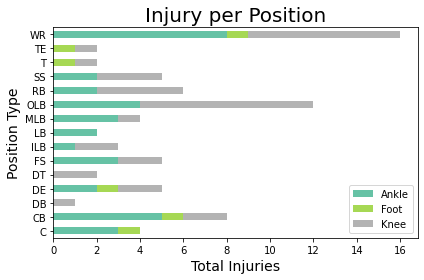

In [149]:
# Bar chart of injury type per position 

injuries_position = Vis_outer.groupby(['BodyPart', 'Position']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='Position', values=0)
injuries_position.plot(kind='barh', stacked=True, colormap='Set2')



# Plot each layer of the bar, adding each bar to the "bottom" so the next bar starts higher.
#for i, col in enumerate(injuries_position.columns):
#  ax.bar(
#      injuries_position.index, injuries_position[col], bottom=bottom, label=col)
#  bottom += np.array(injuries_position[col])

###FIXING NEEDED HERE to not include NaN values
#totals = ((injuries_position.fillna(0)>0)*1).mul(injuries_position.iloc[:,].values).sum(axis=1)


#y_offset = 10
#for i, total in enumerate(totals):
#  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
#          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
#y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
#for bar in ax.patches:
#  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
#      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
#      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
#      round(bar.get_height()),
      # Center the labels and style them a bit.
#      ha='center',
#      color='w',
#      weight='bold',
#      size=8
#  )

plt.title("Injury per Position", fontsize=20)
plt.xlabel("Total Injuries",fontsize=14)
plt.ylabel("Position Type", fontsize=14)

plt.legend(loc='lower right')
plt.show()

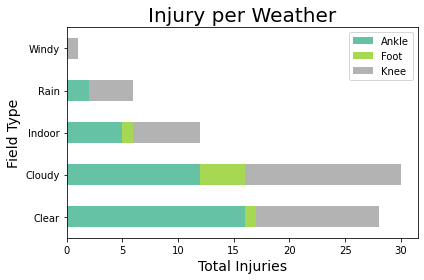

In [159]:
#Injuries vs Weather

injuries_weather = Vis_outer.groupby(['BodyPart', 'Weather']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='Weather', values=0)
injuries_weather.plot(kind='barh', stacked=True, colormap='Set2')

plt.title("Injury per Weather", fontsize=20)
plt.xlabel("Total Injuries",fontsize=14)
plt.ylabel("Field Type", fontsize=14)

plt.legend(loc='upper right')
plt.show()

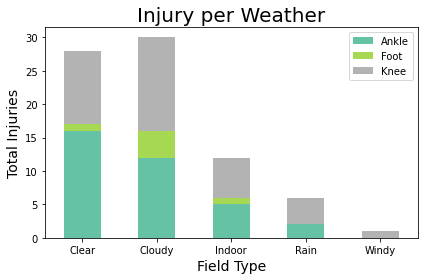

In [168]:
#Injuries vs Weather

injuries_weather = Vis_outer.groupby(['BodyPart', 'Weather']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='Weather', values=0)
injuries_weather.plot(kind='bar', stacked=True, colormap='Set2')

plt.title("Injury per Weather", fontsize=20)
plt.xlabel("Field Type",fontsize=14)
plt.ylabel("Total Injuries", fontsize=14)
plt.xticks(rotation = 0)

plt.legend(loc='upper right')
plt.show()

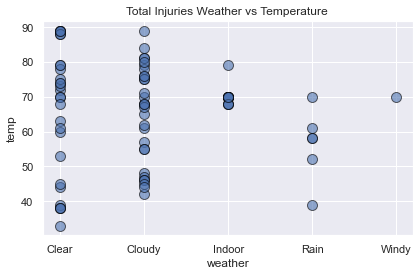

In [231]:
#Scatter plot of injuries vs Temperature

Bodypart_temp = Vis_outer['BodyPart']
weather = Vis_outer['Weather']
temp = Vis_outer['Temperature']

plt.scatter(weather, temp, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('Total Injuries Weather vs Temperature ')
plt.xlabel('weather')
plt.ylabel('temp')

plt.tight_layout()
plt.show()

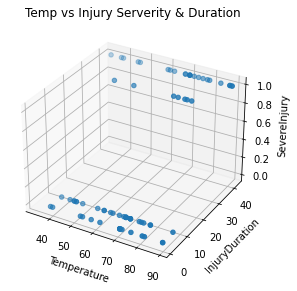

In [203]:
#3D plot of severity, duration & temperature

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = Vis_outer['Temperature']
y = Vis_outer['InjuryDuration']
z = Vis_outer['SevereInjury']

ax.scatter(x, y, z)
ax.set_xlabel("Temperature")
ax.set_ylabel("InjuryDuration")
ax.set_zlabel("SevereInjury")

plt.title("Temp vs Injury Serverity & Duration")

plt.show()

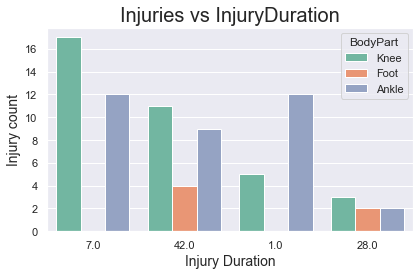

In [224]:
#Bar chart of injuries vs Injury Duration 

sns.countplot(data=Vis_outer, x='InjuryDuration', hue='BodyPart',
              order = Vis_outer['InjuryDuration'].value_counts().index,
             palette="Set2")

plt.title('Injuries vs InjuryDuration',fontsize=20)
plt.xlabel('Injury Duration',fontsize=14)
plt.ylabel('Injury count', fontsize=14)

plt.show()

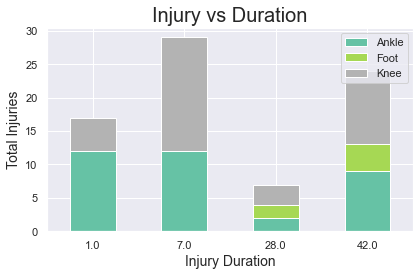

In [237]:
#Stacked Bar chart of injuries vs Injury Duration

injuries_duration = Vis_outer.groupby(['BodyPart', 'InjuryDuration']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='InjuryDuration', values=0)
injuries_duration.plot(kind='bar', stacked=True, colormap='Set2')

plt.title("Injury vs Duration", fontsize=20)
plt.xlabel("Injury Duration",fontsize=14)
plt.ylabel("Total Injuries", fontsize=14)
plt.xticks(rotation = 0)

plt.legend(loc='upper right')
plt.show()

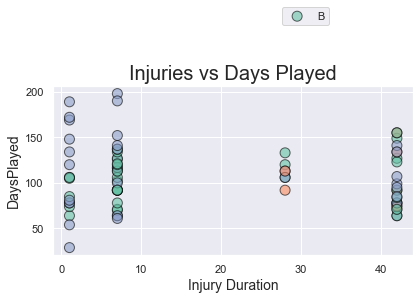

In [263]:
#Scatter plot of injury Duration vs Days played

InjuryDuration = Vis_outer['InjuryDuration']
FieldType_dura = Vis_outer['DaysPlayed']

color_label= Vis_outer["BodyPart"].unique()
rgb_values = sns.color_palette("Set2")
color_map= dict(zip(color_label, rgb_values))

plt.scatter(InjuryDuration, FieldType_dura, s=100, alpha=0.6, edgecolor='black', linewidth=1, c=Vis_outer['BodyPart'].map(color_map))

plt.title('Injuries vs Days Played', fontsize=20)
plt.xlabel('Injury Duration', fontsize=14)
plt.ylabel('DaysPlayed', fontsize=14)
plt.legend("BodyPart", loc='upper center', bbox_to_anchor=(0.7, 1.5), ncol=3)

plt.tight_layout()
plt.show()

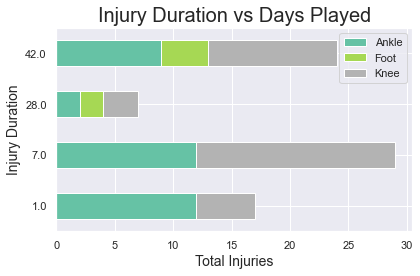

In [269]:
#Stacked Bar chart of injury Duration vs Days played


duration_daysplayed = Vis_outer.groupby(['BodyPart', 'InjuryDuration']).size().reset_index().pivot(columns='BodyPart',
                                                                                             index='InjuryDuration', values=0)
duration_daysplayed.plot(kind='barh', stacked=True, colormap='Set2')

plt.title("Injury Duration vs Days Played", fontsize=20)
plt.xlabel("Total Injuries",fontsize=14)
plt.ylabel("Injury Duration", fontsize=14)
plt.xticks(rotation = 0)

plt.legend(loc='upper right')
plt.show()

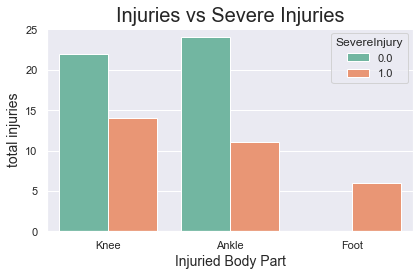

In [272]:
#SevereInjury vs Injured BodyPart

sns.countplot(data=Vis_outer, x='BodyPart', hue='SevereInjury',
              order = Vis_outer['BodyPart'].value_counts().index,
             palette="Set2")

plt.title('Injuries vs Severe Injuries',fontsize=20)
plt.xlabel('Injuried Body Part',fontsize=14)
plt.ylabel('total injuries', fontsize=14)

plt.show()


In [240]:
# Field heatmap of most visited parts of the field 


Vis_outer_df_2 = Vis_outer.pivot("Position", "DaysPlayed", "PlayType")
 
# set heatmap size
plt.figure() 
 
# create heatmap seaborn
heatmap_sns = {"shrink":.5,
           'extend':'both'} 
 
sns.heatmap(Vis_outer_df_2, cmap="inferno", annot = True, fmt = 'd', linewidth = 2, cbar_kws=heatmap_sns)
 
plt.title("Heatmap x", fontsize = 25)
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

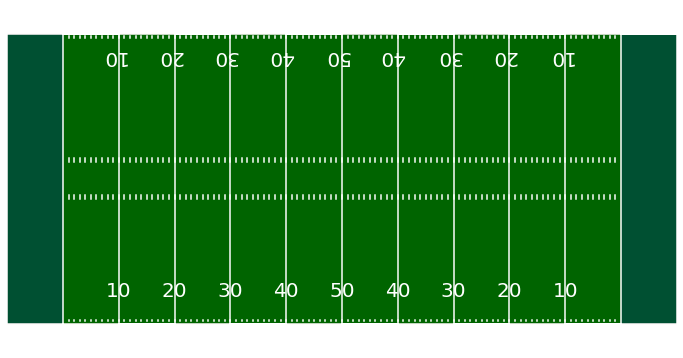

In [51]:
#creating basic football from kaggle @https://www.kaggle.com/code/robikscube/nfl-big-data-bowl-plotting-player-position/notebook

def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()